In [15]:
#Imports

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from ipywidgets import interact, widgets
from IPython.display import display
import plotly.graph_objects as go

In [16]:
#Read in data
df = pd.read_csv('305data.csv')

In [17]:
#Start of Pre-processing

In [18]:
# #Find the nulls

# #Count up all the nulls
# null_values = df.isnull().sum()

# # Print out columns with null values and their respective counts
# print(null_values[null_values > 0])

In [19]:
# #Change "Calm" into 0
# df['3pm wind speed (km/h)'] = df['3pm wind speed (km/h)'].str.strip()
# df['9am wind speed (km/h)'] = df['9am wind speed (km/h)'].str.strip()

# df['3pm wind speed (km/h)'].replace('Calm', 0, inplace=True)
# df['9am wind speed (km/h)'].replace('Calm', 0, inplace=True)

In [20]:
# # Check for unique types in each column
# unique_types = df.applymap(type).nunique()

# # Print out columns with more than one unique type
# print(unique_types[unique_types > 1])

In [21]:
#Used to check datatypes and unique values within columns

# columns_with_multiple_types = unique_types[unique_types > 1].index
# data_types = df[columns_with_multiple_types].dtypes

# # Print out the data types
# print(data_types)

# # Print out the unique values in columns with multiple unique types
# for column in columns_with_multiple_types:
#     unique_values = df[column].dropna().unique()
#     print(f"Column '{column}' has unique values: {unique_values}")


In [22]:
#Begin plotting

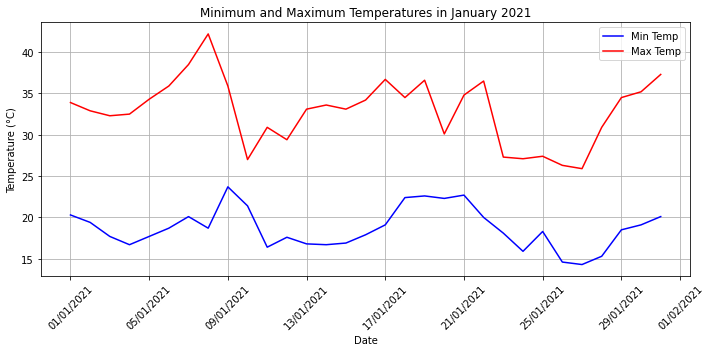

In [23]:
#Shows min and max for each day across January of 2021


# Convert the date column to datetime with the correct format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Sort data by date
df = df.sort_values(by='Date')

# Filter data for January 2021
january_data = df[(df['Date'].dt.year == 2021) & (df['Date'].dt.month == 1)]

# Create the plot
plt.figure(figsize=(10, 5))

# Plot min
plt.plot(january_data['Date'], january_data['Minimum temperature (°C)'], label='Min Temp', color='blue')

# Plot max
plt.plot(january_data['Date'], january_data['Maximum temperature (°C)'], label='Max Temp', color='red')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Minimum and Maximum Temperatures in January 2021')

# Format labels
date_format = DateFormatter("%d/%m/%Y")
plt.gca().xaxis.set_major_formatter(date_format)

# Add legend
plt.legend()

# Add grid
plt.grid(True)

# Rotate labels
plt.xticks(rotation=45)

# Display
plt.tight_layout()
plt.show()

In [24]:
#Specify Year and Month using 2 sliders.
#Generates graph with min and max

#Does not work for data beyond August of 2023


# Convert the date column to datetime with the correct format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Sort data by date
df = df.sort_values(by='Date')

# func for plot
def plot_monthly_data(year, month):
    
    # Filter data
    monthly_data = df[(df['Date'].dt.year == year) & (df['Date'].dt.month == month)]
    
    # Skip empty months
    if len(monthly_data) == 0:
        return
    
    # Create plot
    plt.figure(figsize=(10, 5))
    
    # Plot min 
    plt.plot(monthly_data['Date'], monthly_data['Minimum temperature (°C)'], label='Min Temp', color='blue')
    
    # Plot max
    plt.plot(monthly_data['Date'], monthly_data['Maximum temperature (°C)'], label='Max Temp', color='red')
    
    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.title(f'Minimum and Maximum Temperatures in {monthly_data.iloc[0]["Date"].strftime("%B %Y")}')
    
    # Format labels
    date_format = DateFormatter("%d/%m/%Y")
    plt.gca().xaxis.set_major_formatter(date_format)
    
    # Add legend
    plt.legend()
    
    # Add grid
    plt.grid(True)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Display the plot
    plt.tight_layout()
    plt.show()

# Create sliders
year_slider = widgets.IntSlider(min=2008, max=2023, step=1, value=2021, description='Year')
month_slider = widgets.IntSlider(min=1, max=12, step=1, value=1, description='Month')

# Create generate plot button
button = widgets.Button(description="Generate Plot")

# func for button click
def on_button_click(b):
    plot_monthly_data(year_slider.value, month_slider.value)

# Attach the button click event handler
button.on_click(on_button_click)

# Display the widgets
display(year_slider, month_slider, button)

IntSlider(value=2021, description='Year', max=2023, min=2008)

IntSlider(value=1, description='Month', max=12, min=1)

Button(description='Generate Plot', style=ButtonStyle())

In [25]:
#Months averaged and shown across 12 months(Jan->Feb)
#Slider to select what year

#DOES NOT WORK FOR 2023


# Convert the date column to datetime with the correct format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Function for plot
def plot_yearly_averages(year):
    
    # Filter data for the selected year
    yearly_data = df[df['Date'].dt.year == year]

    # Calculate the average minimum and maximum temperatures for each month
    monthly_averages = yearly_data.groupby(yearly_data['Date'].dt.month)[['Minimum temperature (°C)', 'Maximum temperature (°C)']].mean()

    # Create a new column for the month label (e.g., Jan, Feb, ..., Dec)
    monthly_averages['Month'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    # Create the plot
    plt.figure(figsize=(10, 5))

    # Plot average min
    plt.plot(monthly_averages['Month'], monthly_averages['Minimum temperature (°C)'], label='Avg Min Temp', color='blue', marker='o')

    # Plot average max
    plt.plot(monthly_averages['Month'], monthly_averages['Maximum temperature (°C)'], label='Avg Max Temp', color='red', marker='o')

    # Add labels and title
    plt.xlabel('Month')
    plt.ylabel('Temperature (°C)')
    plt.title(f'Yearly Average Temperatures for {year}')

    # Add legend
    plt.legend()

    # Add grid
    plt.grid(True)

    # Display the plot
    plt.tight_layout()
    plt.show()

# Create slider
year_slider = widgets.IntSlider(min=2008, max=2023, step=1, value=2021, description='Year')

# Interact the slider with the plot function
interact(plot_yearly_averages, year=year_slider)

interactive(children=(IntSlider(value=2021, description='Year', max=2023, min=2008), Output()), _dom_classes=(…

<function __main__.plot_yearly_averages(year)>

In [26]:
#Compare the monthly averages across a year of 2 years.
#Slider to choose the 2 years, one shown with triangles other shown with circles

#DOES NOT WORK FOR 2023

#Might need to move each of the sliders for it to generate the first plot


# Convert the date column to datetime with the correct format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Function to generate and display the plot for the selected years
def plot_selected_years(year1, year2):
    
    # Filter data 
    year1_data = df[df['Date'].dt.year == year1]
    year2_data = df[df['Date'].dt.year == year2]

    # Calculate the average minimum and maximum temperatures for each month
    monthly_averages_year1 = year1_data.groupby(year1_data['Date'].dt.month)[['Minimum temperature (°C)', 'Maximum temperature (°C)']].mean()
    monthly_averages_year2 = year2_data.groupby(year2_data['Date'].dt.month)[['Minimum temperature (°C)', 'Maximum temperature (°C)']].mean()

    # Create a new column for the month label
    monthly_averages_year1['Month'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    monthly_averages_year2['Month'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    # Create the plot
    plt.figure(figsize=(10, 5))

    # Plot average min
    plt.plot(monthly_averages_year1['Month'], monthly_averages_year1['Minimum temperature (°C)'], marker='^', color='blue', label=f'Min Temp {year1}')

    # Plot average max
    plt.plot(monthly_averages_year1['Month'], monthly_averages_year1['Maximum temperature (°C)'], marker='^', color='red', label=f'Max Temp {year1}')

    # Plot average min
    plt.plot(monthly_averages_year2['Month'], monthly_averages_year2['Minimum temperature (°C)'], marker='o', color='blue', label=f'Min Temp {year2}')

    # Plot average max
    plt.plot(monthly_averages_year2['Month'], monthly_averages_year2['Maximum temperature (°C)'], marker='o', color='red', label=f'Max Temp {year2}')

    # Add labels and title
    plt.xlabel('Month')
    plt.ylabel('Temperature (°C)')
    plt.title(f'Yearly Average Temperatures for {year1} and {year2}')

    # Add legend
    plt.legend()

    # Add grid
    plt.grid(True)

    # Display the plot
    plt.tight_layout()
    plt.show()

# Create sliders for selecting the years
year1_slider = widgets.IntSlider(min=2008, max=2023, step=1, value=2021, description='Year 1')
year2_slider = widgets.IntSlider(min=2008, max=2023, step=1, value=2022, description='Year 2')

# Create an output widget to display the plot
output = widgets.Output()

# Define a function to update the plot when the sliders change
def update_plot(change):
    with output:
        output.clear_output()
        plot_selected_years(year1_slider.value, year2_slider.value)

# Observe the slider values and call the update function
year1_slider.observe(update_plot, 'value')
year2_slider.observe(update_plot, 'value')

# Display the widgets
display(year1_slider, year2_slider, output)

IntSlider(value=2021, description='Year 1', max=2023, min=2008)

IntSlider(value=2022, description='Year 2', max=2023, min=2008)

Output()

In [27]:
# Plot min/max for each month for every year.

# Convert the date column to datetime with the correct format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Get mins and maxs
monthly_max_temps = df.groupby([df['Date'].dt.year, df['Date'].dt.month])['Maximum temperature (°C)'].max()
monthly_min_temps = df.groupby([df['Date'].dt.year, df['Date'].dt.month])['Minimum temperature (°C)'].min()

# Combine the data 
monthly_data = pd.DataFrame({'Year': monthly_max_temps.index.get_level_values(0),
                             'Month': monthly_max_temps.index.get_level_values(1),
                             'Max Temp': monthly_max_temps.values,
                             'Min Temp': monthly_min_temps.values})

# Create the figure
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=monthly_data.index, y=monthly_data['Max Temp'], mode='markers',
                         name='Max Temp', marker=dict(color='red', symbol='circle')))
fig.add_trace(go.Scatter(x=monthly_data.index, y=monthly_data['Min Temp'], mode='markers',
                         name='Min Temp', marker=dict(color='blue', symbol='triangle-up')))

# Add hover information for exact date and temperature
hover_text_max = [f'Year: {year}, Month: {month}<br>Date: {df[(df["Date"].dt.year == year) & (df["Date"].dt.month == month) & (df["Maximum temperature (°C)"] == max_temp)]["Date"].dt.strftime("%d/%m/%Y").values[0]}<br>Temp: {max_temp}°C' for year, month, max_temp in zip(monthly_data['Year'], monthly_data['Month'], monthly_data['Max Temp'])]
hover_text_min = [f'Year: {year}, Month: {month}<br>Date: {df[(df["Date"].dt.year == year) & (df["Date"].dt.month == month) & (df["Minimum temperature (°C)"] == min_temp)]["Date"].dt.strftime("%d/%m/%Y").values[0]}<br>Temp: {min_temp}°C' for year, month, min_temp in zip(monthly_data['Year'], monthly_data['Month'], monthly_data['Min Temp'])]

fig.update_traces(text=hover_text_max + hover_text_min, hoverinfo='text')

# add line to connect the dots
progression_line_max = go.Scatter(x=monthly_data.index, y=monthly_data['Max Temp'], mode='lines',
                                  line=dict(color='red', width=2, dash='dash'), showlegend=False)
progression_line_min = go.Scatter(x=monthly_data.index, y=monthly_data['Min Temp'], mode='lines',
                                  line=dict(color='blue', width=2, dash='dash'), showlegend=False)

fig.add_trace(progression_line_max)
fig.add_trace(progression_line_min)

# Update axes labels and title
fig.update_layout(title='Highest and Lowest Temperatures Each Month', xaxis_title='Date', yaxis_title='Temperature (°C)')

# x-axis
year_starts = monthly_data[monthly_data['Month'] == 1].index
fig.update_xaxes(tickmode='array', tickvals=year_starts, ticktext=monthly_data['Year'][year_starts])

# Show the figure
fig.show()


In [28]:
#Highest and lowest point for each year all on one plot


# Convert the date column to datetime with the correct format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Step 1: Obtain the highest and lowest temperature of each year
yearly_max_temps = df.groupby(df['Date'].dt.year)['Maximum temperature (°C)'].max()
yearly_min_temps = df.groupby(df['Date'].dt.year)['Minimum temperature (°C)'].min()

# Combine the data for plotting
yearly_data = pd.DataFrame({'Year': yearly_max_temps.index, 'Max Temp': yearly_max_temps.values, 'Min Temp': yearly_min_temps.values})

# Create the figure
fig = go.Figure()

# Add traces for max and min temperatures
fig.add_trace(go.Scatter(x=yearly_data['Year'], y=yearly_data['Max Temp'], mode='lines+markers',
                         name='Max Temp', line=dict(color='red')))
fig.add_trace(go.Scatter(x=yearly_data['Year'], y=yearly_data['Min Temp'], mode='lines+markers',
                         name='Min Temp', line=dict(color='blue')))

# Add hover information for exact date and temperature
hover_text = [f'Date: {df[(df["Date"].dt.year == year) & (df["Maximum temperature (°C)"] == max_temp)]["Date"].dt.strftime("%d/%m/%Y").values[0]}<br>Temp: {max_temp}°C' for year, max_temp in zip(yearly_data['Year'], yearly_data['Max Temp'])]
fig.update_traces(text=hover_text, hoverinfo='text')

# Update axes labels and title
fig.update_layout(title='Highest and Lowest Temperatures Each Year', xaxis_title='Year', yaxis_title='Temperature (°C)')

# Show the figure
fig.show()
